# Question 2 Data Frame

In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read q2 data File and store into Pandas data frame
q2_data = pd.read_csv("Resources2/owid-covid-data-2.csv")
q2_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [3]:
# Replacing all the NaN to zero
q2_data = q2_data.fillna(0)
q2_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.000,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
1,ABW,North America,Aruba,2020-03-19,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
3,ABW,North America,Aruba,2020-03-21,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
4,ABW,North America,Aruba,2020-03-22,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0


#### This shows the latest figures for each country as of 30/9

In [4]:
# Columns to drop for pre-existing health factors
q2_data_frame = q2_data.drop(columns=['iso_code','new_cases_smoothed','new_deaths_smoothed','new_cases_smoothed_per_million','new_deaths_smoothed_per_million','new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'gdp_per_capita', 'aged_65_older', 'aged_70_older', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'positive_rate',
       'tests_per_case','tests_units', 'stringency_index','extreme_poverty','population_density', 'hospital_beds_per_thousand'])

# Drop the last two rows where it shows total world values/continent = 0
q2_data_frame = q2_data_frame[q2_data_frame['continent'] != 0]

# Taking the last row to indicate the last reported case
q2_data_frame = q2_data_frame.drop_duplicates(subset=['location'],keep='last')

q2_data_frame.to_csv('q2_data.csv', index=False) 

q2_data_frame

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
196,North America,Aruba,2020-09-30,3934.0,62.0,26.0,1.0,106766.0,41.2,0.000,11.62,0.0,0.0,0.000,76.29,0.000
471,Asia,Afghanistan,2020-09-30,39254.0,15.0,1458.0,2.0,38928341.0,18.6,597.029,9.59,0.0,0.0,37.746,64.83,0.498
664,Africa,Angola,2020-09-30,4905.0,108.0,179.0,3.0,32866268.0,16.8,276.045,3.94,0.0,0.0,26.664,61.15,0.581
852,North America,Anguilla,2020-09-30,3.0,0.0,0.0,0.0,15002.0,0.0,0.000,0.00,0.0,0.0,0.000,81.88,0.000
1058,Europe,Albania,2020-09-30,13518.0,127.0,384.0,4.0,2877800.0,38.0,304.195,10.08,7.1,51.2,0.000,78.57,0.785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45764,Europe,Kosovo,2020-09-30,15574.0,54.0,625.0,0.0,1932774.0,0.0,0.000,0.00,0.0,0.0,0.000,0.00,0.000
45938,Asia,Yemen,2020-09-30,2035.0,0.0,588.0,0.0,29825968.0,20.3,495.003,5.35,7.6,29.2,49.542,66.12,0.452
46175,Africa,South Africa,2020-09-30,672572.0,903.0,16667.0,81.0,59308690.0,27.3,200.380,5.52,8.1,33.2,43.993,64.13,0.699
46371,Africa,Zambia,2020-09-30,14715.0,55.0,332.0,0.0,18383956.0,17.7,234.499,3.94,3.1,24.7,13.938,63.89,0.588


In [5]:
# read infection rate data
infection_rates_2 = pd.read_csv("Resources2/country_infection_rate.csv")
infection_rates_2 = infection_rates_2.drop(columns=['Unnamed: 0'])
infection_rates_2

,location,infection_rate
0,Aruba,3.684694
1,Afghanistan,0.100837
2,Angola,0.014924
3,Anguilla,0.019997
4,Albania,0.469734
...,...,...
205,Kosovo,0.805785
206,Yemen,0.006823
207,South Africa,1.134019
208,Zambia,0.080043


In [6]:
# Calculate infection rate and append it on the dataframe
combined_data = pd.merge(q2_data_frame, infection_rates_2,
                                 how='outer')
combined_data

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index,infection_rate
0,North America,Aruba,2020-09-30,3934.0,62.0,26.0,1.0,106766.0,41.2,0.000,11.62,0.0,0.0,0.000,76.29,0.000,3.684694
1,Asia,Afghanistan,2020-09-30,39254.0,15.0,1458.0,2.0,38928341.0,18.6,597.029,9.59,0.0,0.0,37.746,64.83,0.498,0.100837
2,Africa,Angola,2020-09-30,4905.0,108.0,179.0,3.0,32866268.0,16.8,276.045,3.94,0.0,0.0,26.664,61.15,0.581,0.014924
3,North America,Anguilla,2020-09-30,3.0,0.0,0.0,0.0,15002.0,0.0,0.000,0.00,0.0,0.0,0.000,81.88,0.000,0.019997
4,Europe,Albania,2020-09-30,13518.0,127.0,384.0,4.0,2877800.0,38.0,304.195,10.08,7.1,51.2,0.000,78.57,0.785,0.469734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Europe,Kosovo,2020-09-30,15574.0,54.0,625.0,0.0,1932774.0,0.0,0.000,0.00,0.0,0.0,0.000,0.00,0.000,0.805785
206,Asia,Yemen,2020-09-30,2035.0,0.0,588.0,0.0,29825968.0,20.3,495.003,5.35,7.6,29.2,49.542,66.12,0.452,0.006823
207,Africa,South Africa,2020-09-30,672572.0,903.0,16667.0,81.0,59308690.0,27.3,200.380,5.52,8.1,33.2,43.993,64.13,0.699,1.134019
208,Africa,Zambia,2020-09-30,14715.0,55.0,332.0,0.0,18383956.0,17.7,234.499,3.94,3.1,24.7,13.938,63.89,0.588,0.080043


### 1.Total smoker rate vs. total covid infection rate by countries. Does the countries with more smokers has a higher infection rate?

In [7]:
# Drop the rows where the female smoker rates are 0.
q2_data_frame_1 = combined_data[combined_data['female_smokers'] == 0].index

# Delete these row indexes from dataFrame
combined_data.drop(q2_data_frame_1 , inplace=True)

combined_data

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index,infection_rate
4,Europe,Albania,2020-09-30,13518.0,127.0,384.0,4.0,2877800.0,38.0,304.195,10.08,7.1,51.2,0.000,78.57,0.785,0.469734
5,Europe,Andorra,2020-09-30,1966.0,0.0,53.0,0.0,77265.0,0.0,109.135,7.97,29.0,37.8,0.000,83.73,0.858,2.544490
6,Asia,United Arab Emirates,2020-09-30,93090.0,995.0,416.0,3.0,9890400.0,34.0,317.840,17.26,1.2,37.4,0.000,77.97,0.863,0.941216
7,South America,Argentina,2020-09-30,736596.0,13477.0,16519.0,406.0,45195777.0,31.9,191.032,5.50,16.2,27.7,0.000,76.67,0.825,1.629789
8,Asia,Armenia,2020-09-30,49901.0,327.0,958.0,1.0,2963234.0,35.7,341.010,7.11,1.5,52.1,94.043,75.09,0.755,1.684005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Asia,Vietnam,2020-09-30,1094.0,17.0,35.0,0.0,97338583.0,32.6,245.465,6.00,1.0,45.9,85.847,75.40,0.694,0.001124
206,Asia,Yemen,2020-09-30,2035.0,0.0,588.0,0.0,29825968.0,20.3,495.003,5.35,7.6,29.2,49.542,66.12,0.452,0.006823
207,Africa,South Africa,2020-09-30,672572.0,903.0,16667.0,81.0,59308690.0,27.3,200.380,5.52,8.1,33.2,43.993,64.13,0.699,1.134019
208,Africa,Zambia,2020-09-30,14715.0,55.0,332.0,0.0,18383956.0,17.7,234.499,3.94,3.1,24.7,13.938,63.89,0.588,0.080043


In [8]:
# Drop the rows where the male smoker rates are 0.
q2_data_frame_2 = combined_data[combined_data['male_smokers'] == 0].index

# Delete these row indexes from dataFrame
combined_data.drop(q2_data_frame_2, inplace=True)

combined_data

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index,infection_rate
4,Europe,Albania,2020-09-30,13518.0,127.0,384.0,4.0,2877800.0,38.0,304.195,10.08,7.1,51.2,0.000,78.57,0.785,0.469734
5,Europe,Andorra,2020-09-30,1966.0,0.0,53.0,0.0,77265.0,0.0,109.135,7.97,29.0,37.8,0.000,83.73,0.858,2.544490
6,Asia,United Arab Emirates,2020-09-30,93090.0,995.0,416.0,3.0,9890400.0,34.0,317.840,17.26,1.2,37.4,0.000,77.97,0.863,0.941216
7,South America,Argentina,2020-09-30,736596.0,13477.0,16519.0,406.0,45195777.0,31.9,191.032,5.50,16.2,27.7,0.000,76.67,0.825,1.629789
8,Asia,Armenia,2020-09-30,49901.0,327.0,958.0,1.0,2963234.0,35.7,341.010,7.11,1.5,52.1,94.043,75.09,0.755,1.684005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Asia,Vietnam,2020-09-30,1094.0,17.0,35.0,0.0,97338583.0,32.6,245.465,6.00,1.0,45.9,85.847,75.40,0.694,0.001124
206,Asia,Yemen,2020-09-30,2035.0,0.0,588.0,0.0,29825968.0,20.3,495.003,5.35,7.6,29.2,49.542,66.12,0.452,0.006823
207,Africa,South Africa,2020-09-30,672572.0,903.0,16667.0,81.0,59308690.0,27.3,200.380,5.52,8.1,33.2,43.993,64.13,0.699,1.134019
208,Africa,Zambia,2020-09-30,14715.0,55.0,332.0,0.0,18383956.0,17.7,234.499,3.94,3.1,24.7,13.938,63.89,0.588,0.080043


In [9]:
# Sampling 10% of the country from the database
sampling = combined_data.sample(frac=0.1, random_state=0)
sampling

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index,infection_rate
14,Europe,Belgium,2020-09-30,117021.0,15.0,10001.0,0.0,1.158962e+07,41.8,114.898,4.29,25.1,31.4,0.000,81.63,0.916,1.009706
107,Asia,South Korea,2020-09-30,23812.0,113.0,413.0,6.0,5.126918e+07,43.4,85.998,6.80,6.2,40.9,0.000,83.03,0.903,0.046445
42,Africa,Comoros,2020-09-30,479.0,1.0,7.0,0.0,8.695950e+05,20.4,261.516,11.88,4.4,23.6,15.574,64.32,0.503,0.055083
177,Europe,Slovenia,2020-09-30,5487.0,93.0,138.0,2.0,2.078932e+06,44.5,153.493,7.25,20.1,25.0,0.000,81.32,0.896,0.263934
36,Asia,China,2020-09-30,90528.0,23.0,4739.0,0.0,1.439324e+09,38.7,261.899,9.74,1.9,48.4,0.000,76.91,0.752,0.006290
64,Oceania,Fiji,2020-09-30,32.0,0.0,2.0,0.0,8.964440e+05,28.6,412.820,14.49,10.2,34.8,0.000,67.44,0.741,0.003570
118,Europe,Luxembourg,2020-09-30,8431.0,55.0,124.0,0.0,6.259760e+05,39.7,128.275,4.42,20.9,26.0,0.000,82.25,0.904,1.346857
115,Asia,Sri Lanka,2020-09-30,3374.0,11.0,13.0,0.0,2.141325e+07,34.1,197.093,10.68,0.3,27.0,0.000,76.98,0.770,0.015757
185,Africa,Togo,2020-09-30,1759.0,10.0,48.0,1.0,8.278737e+06,19.4,280.033,6.15,0.9,14.2,10.475,61.04,0.503,0.021247
50,Europe,Germany,2020-09-30,289219.0,1798.0,9488.0,17.0,8.378394e+07,46.6,156.139,8.31,28.2,33.1,0.000,81.33,0.936,0.345196


In [10]:
sampling = sampling.drop(columns=['new_cases', 'date', 'total_cases', 'new_deaths', 'total_deaths', 'population', 'median_age', 'cardiovasc_death_rate', 'diabetes_prevalence', 'handwashing_facilities', 'life_expectancy', 'human_development_index'])
sampling

,continent,location,female_smokers,male_smokers,infection_rate
14,Europe,Belgium,25.1,31.4,1.009706
107,Asia,South Korea,6.2,40.9,0.046445
42,Africa,Comoros,4.4,23.6,0.055083
177,Europe,Slovenia,20.1,25.0,0.263934
36,Asia,China,1.9,48.4,0.006290
64,Oceania,Fiji,10.2,34.8,0.003570
118,Europe,Luxembourg,20.9,26.0,1.346857
115,Asia,Sri Lanka,0.3,27.0,0.015757
185,Africa,Togo,0.9,14.2,0.021247
50,Europe,Germany,28.2,33.1,0.345196


In [11]:
female_smoker = sampling['female_smokers'].tolist()
male_smoker = sampling['male_smokers'].tolist()
infection_rate = sampling['infection_rate'].tolist()
country = sampling['location'].tolist()
country

['Belgium',
 'South Korea',
 'Comoros',
 'Slovenia',
 'China',
 'Fiji',
 'Luxembourg',
 'Sri Lanka',
 'Togo',
 'Germany',
 'Zambia',
 'Colombia',
 'Philippines',
 'Niger']

In [17]:
len(country)

14

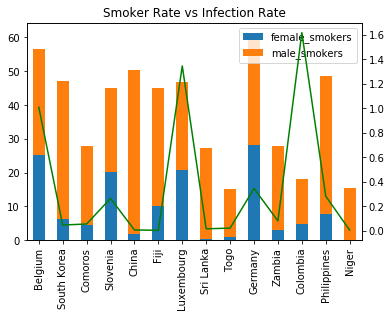

In [18]:
# Construct a line-box plot
width = .5

smoker_infection = pd.DataFrame({
 'female_smokers': female_smoker,
 'male_smokers': male_smoker,
 'infection_rate': infection_rate}, index=country)

smoker_infection[['female_smokers','male_smokers']].plot(kind='bar', stacked=True, width = width)
smoker_infection['infection_rate'].plot(secondary_y=True, color = 'g', title = 'Smoker Rate vs Infection Rate', rot=90)

plt.savefig("smoker_infection.png")

### 2.Median age vs. total covid infection rate by countries. Does the countries with older median age has a higher infection rate?

In [24]:
# Use the whole world's data this time and drop the irrelavant columns
age_infection = combined_data.drop(columns=['new_cases', 'date', 'total_cases', 'new_deaths', 'total_deaths', 'population', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'life_expectancy', 'human_development_index'])
age_infection

,continent,location,median_age,infection_rate
4,Europe,Albania,38.0,0.469734
5,Europe,Andorra,0.0,2.544490
6,Asia,United Arab Emirates,34.0,0.941216
7,South America,Argentina,31.9,1.629789
8,Asia,Armenia,35.7,1.684005
...,...,...,...,...
204,Asia,Vietnam,32.6,0.001124
206,Asia,Yemen,20.3,0.006823
207,Africa,South Africa,27.3,1.134019
208,Africa,Zambia,17.7,0.080043


In [25]:
sampling2 = age_infection.sample(frac=0.2, random_state=0)
sampling2.head()

,continent,location,median_age,infection_rate
14,Europe,Belgium,41.8,1.009706
107,Asia,South Korea,43.4,0.046445
42,Africa,Comoros,20.4,0.055083
177,Europe,Slovenia,44.5,0.263934
36,Asia,China,38.7,0.006290


In [26]:
median_age = sampling2['median_age'].tolist()
infection = sampling2['infection_rate'].tolist()
country = sampling2['location'].tolist()
country

['Belgium',
 'South Korea',
 'Comoros',
 'Slovenia',
 'China',
 'Fiji',
 'Luxembourg',
 'Sri Lanka',
 'Togo',
 'Germany',
 'Zambia',
 'Colombia',
 'Philippines',
 'Niger',
 'Japan',
 'Saudi Arabia',
 'Gambia',
 'Switzerland',
 'Netherlands',
 'Georgia',
 'Singapore',
 'Israel',
 'Barbados',
 'Paraguay',
 'Greece',
 'Nepal',
 'Ethiopia',
 'Azerbaijan']

In [27]:
len(country)

28

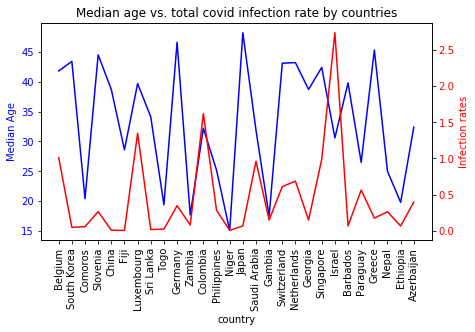

In [30]:
#x_axis=np.arange(0,28,1)
y_axis1=sampling2["median_age"]
y_axis2=sampling2["infection_rate"]
x_axis= sampling2["location"]

#Plot line 1
fig, ax1=plt.subplots(figsize=(7,4))
ax1.plot(x_axis, y_axis1, color="Blue")
ax1.set_xlabel("country")
ax1.set_ylabel("Median Age", color="Blue")
ax1.tick_params(axis='y', labelcolor="Blue")
labels = country
plt.xticks(x_axis, labels, rotation=90)

#Plot line 2
ax2=ax1.twinx()
ax2.plot(x_axis, y_axis2, color="Red")
ax2.set_ylabel("Infection rates", color="Red")
ax2.tick_params(axis='y', labelcolor="Red")

#Add title and labels
plt.title("Median age vs. total covid infection rate by countries")

plt.savefig("median_age_infection.png")

### 3. Handwashing facilities availability vs Infection Rates. Does the countries have access to more handwashing facilities has a lower infection rate?

In [31]:
# Use the whole world's data this time and drop the irrelavant columns
handwashing = combined_data.drop(columns=['new_cases', 'date', 'total_cases', 'new_deaths', 'median_age', 'total_deaths', 'population', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'life_expectancy', 'human_development_index'])
handwashing

,continent,location,handwashing_facilities,infection_rate
4,Europe,Albania,0.000,0.469734
5,Europe,Andorra,0.000,2.544490
6,Asia,United Arab Emirates,0.000,0.941216
7,South America,Argentina,0.000,1.629789
8,Asia,Armenia,94.043,1.684005
...,...,...,...,...
204,Asia,Vietnam,85.847,0.001124
206,Asia,Yemen,49.542,0.006823
207,Africa,South Africa,43.993,1.134019
208,Africa,Zambia,13.938,0.080043


In [32]:
handwashing = handwashing[handwashing['handwashing_facilities'] != 0]
handwashing

,continent,location,handwashing_facilities,infection_rate
8,Asia,Armenia,94.043,1.684005
12,Asia,Azerbaijan,83.241,0.395683
15,Africa,Benin,11.035,0.019302
17,Africa,Burkina Faso,11.877,0.009721
18,Asia,Bangladesh,34.808,0.219834
...,...,...,...,...
204,Asia,Vietnam,85.847,0.001124
206,Asia,Yemen,49.542,0.006823
207,Africa,South Africa,43.993,1.134019
208,Africa,Zambia,13.938,0.080043


In [33]:
sampling3 = handwashing.sample(frac=0.3, random_state=0)
sampling3

,continent,location,handwashing_facilities,infection_rate
157,South America,Paraguay,79.602,0.562227
116,Africa,Lesotho,2.117,0.073567
149,Asia,Pakistan,59.607,0.141364
207,Africa,South Africa,43.993,1.134019
129,Asia,Myanmar,79.287,0.022836
127,Africa,Mali,52.232,0.015259
124,Asia,Maldives,95.803,1.885885
142,Africa,Nigeria,41.949,0.028450
105,Asia,Cambodia,66.229,0.001657
208,Africa,Zambia,13.938,0.080043


In [34]:
len(sampling3)

19

In [35]:
handwashing = sampling3['handwashing_facilities'].tolist()
infection = sampling3['infection_rate'].tolist()
country = sampling3['location'].tolist()

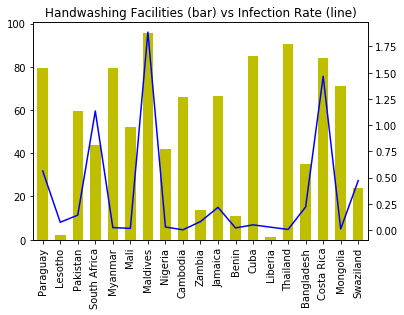

In [36]:
# Construct a line-bar plot 
width = .6

handwashing_infection = pd.DataFrame({
 'handwashing_facilities': handwashing,
 'infection_rate': infection}, index=country)

handwashing_infection['handwashing_facilities'].plot(kind='bar', color = 'y', width = width)
handwashing_infection['infection_rate'].plot(secondary_y=True, color = 'b', title = 'Handwashing Facilities (bar) vs Infection Rate (line)', rot=90)

plt.savefig("handwashing_facilities_infection.png")